### Principal Component Analysis (PCA): An In-Depth Tutorial

#### Mathematical Background

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction, data visualization, and noise reduction. It transforms a set of correlated variables into a set of uncorrelated variables called principal components, ordered by the amount of variance they capture from the data.

##### Steps in PCA

1. **Standardize the Data**

Given a dataset with $n$ observations and $p$ features, standardize the data to have zero mean and unit variance:

$$
x_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

where $x_{ij}$ is the $i$-th observation of the $j$-th feature, $\mu_j$ is the mean of the $j$-th feature, and $\sigma_j$ is the standard deviation of the $j$-th feature.

2. **Compute the Covariance Matrix**

The covariance matrix $\mathbf{C}$ is computed as:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{X}^T \mathbf{X}
$$

where $\mathbf{X}$ is the standardized data matrix.

3. **Compute the Eigenvalues and Eigenvectors**

Solve the eigenvalue equation:

$$
\mathbf{C} \mathbf{v} = \lambda \mathbf{v}
$$

where $\lambda$ represents the eigenvalues and $\mathbf{v}$ represents the eigenvectors of the covariance matrix $\mathbf{C}$. The eigenvalues indicate the amount of variance captured by each principal component, and the eigenvectors represent the directions of the principal components.

4. **Sort Eigenvalues and Eigenvectors**

Sort the eigenvalues in descending order and arrange the corresponding eigenvectors to form the principal components. The principal component corresponding to the largest eigenvalue captures the most variance.

5. **Transform the Data**

Project the original data onto the principal components to obtain the transformed data:

$$
\mathbf{Y} = \mathbf{X} \mathbf{V}
$$

where $\mathbf{Y}$ is the matrix of principal components, and $\mathbf{V}$ is the matrix of eigenvectors.

##### Numerical Example

Consider a dataset with two features:

$$
\mathbf{X} = \begin{bmatrix}
2.5 & 2.4 \\
0.5 & 0.7 \\
2.2 & 2.9 \\
1.9 & 2.2 \\
3.1 & 3.0 \\
2.3 & 2.7 \\
2.0 & 1.6 \\
1.0 & 1.1 \\
1.5 & 1.6 \\
1.1 & 0.9
\end{bmatrix}
$$

1. **Standardize the Data**

Compute the mean and standard deviation of each feature, then standardize the data:

$$
\mathbf{X}_{\text{standardized}} = \begin{bmatrix}
0.69 & 0.49 \\
-1.31 & -1.21 \\
0.39 & 0.99 \\
0.09 & 0.29 \\
1.29 & 1.09 \\
0.19 & 0.79 \\
-0.81 & -0.91 \\
-1.81 & -1.41 \\
-1.31 & -1.21 \\
-1.81 & -1.41
\end{bmatrix}
$$

2. **Compute the Covariance Matrix**

$$
\mathbf{C} = \frac{1}{9} \mathbf{X}_{\text{standardized}}^T \mathbf{X}_{\text{standardized}} = \begin{bmatrix}
0.61655556 & 0.61544444 \\
0.61544444 & 0.71655556
\end{bmatrix}
$$

3. **Compute the Eigenvalues and Eigenvectors**

The eigenvalues and eigenvectors of the covariance matrix are:

$$
\lambda_1 = 1.28402771, \quad \lambda_2 = 0.04908339
$$

$$
\mathbf{v}_1 = \begin{bmatrix} 0.6778734 \\ 0.73517866 \end{bmatrix}, \quad \mathbf{v}_2 = \begin{bmatrix} -0.73517866 \\ 0.6778734 \end{bmatrix}
$$

4. **Sort Eigenvalues and Eigenvectors**

Since $\lambda_1 > \lambda_2$, the first principal component is $\mathbf{v}_1$ and the second principal component is $\mathbf{v}_2$.

5. **Transform the Data**

Project the original data onto the principal components:

$$
\mathbf{Y} = \mathbf{X}_{\text{standardized}} \mathbf{V} = \begin{bmatrix}
0.82797019 & -0.17511531 \\
-1.77758033 & -0.14285723 \\
0.99219749 & 0.38437499 \\
0.27421042 & 0.13041721 \\
1.67580142 & -0.20949846 \\
0.9129491 & 0.17528244 \\
-0.09910944 & -0.3498247 \\
-1.14457216 & -0.04641726 \\
-0.43804614 & 0.01776463 \\
-1.22382056 & -0.16267529
\end{bmatrix}
$$

##### Key Properties of PCA

1. **Variance Maximization**: PCA identifies the directions (principal components) in which the data varies the most. The first principal component accounts for the largest possible variance.

2. **Orthogonality**: The principal components are orthogonal to each other, meaning they are uncorrelated. This property helps in reducing redundancy in the data.

3. **Dimensionality Reduction**: PCA can reduce the dimensionality of data by selecting the top $k$ principal components that explain a significant amount of variance, allowing for simpler models and visualizations.

4. **Eigenvalues and Eigenvectors**: The eigenvalues of the covariance matrix represent the amount of variance captured by each principal component, while the eigenvectors provide the direction of these components in the feature space.

5. **Non-linear Transformations**: PCA is a linear method. For non-linear relationships, techniques like kernel PCA can be used.

##### Important Notes on Using PCA

- **Variance Explained**: The eigenvalues indicate the amount of variance explained by each principal component. The ratio of an eigenvalue to the sum of all eigenvalues gives the proportion of variance explained by the corresponding principal component.

- **Dimensionality Reduction**: PCA is used to reduce the dimensionality of data while retaining as much variance as possible. By selecting the top $k$ principal components, the data can be transformed into a $k$-dimensional space.

- **Data Visualization**: PCA helps in visualizing high-dimensional data in 2D or 3D by projecting the data onto the top principal components.

- **Noise Reduction**: By discarding principal components with low variance, PCA can reduce the noise in the data and improve the performance of subsequent analysis.

- **Assumptions**: PCA assumes that the principal components with the highest variance are the most important. This may not always be true, especially if the data is noisy or has outliers.

This tutorial provides a comprehensive overview of PCA, demonstrating its importance and application in data analysis and dimensionality reduction.


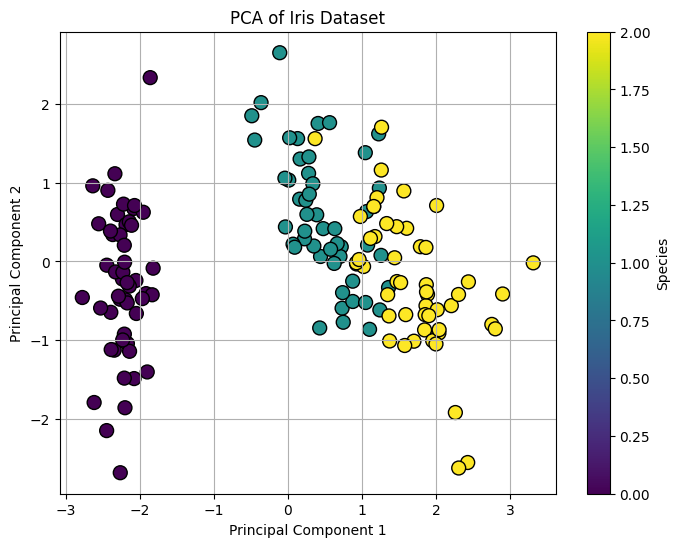

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute the covariance matrix
cov_matrix = np.cov(X_std.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 2 eigenvectors (principal components)
k = 2
eigenvectors_k = eigenvectors[:, :k]

# Transform the data
X_pca = X_std.dot(eigenvectors_k)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.grid()
plt.show()
